### Xtern AI Work Sample Assessment

1. Given the data set, do a quick exploratory data analysis to get a feel for the distributions and biases of the data.  Report any visualizations and findings used and suggest any other impactful business use cases for that data.

2. Consider implications of data collection, storage, and data biases you would consider relevant here considering Data Ethics, Business Outcomes, and Technical Implications

- Discuss Ethical implications of these factors
- Discuss Business outcome implications of these factors
- Discuss Technical implications of these factors

3. Build a model to predict a customers order from their available information.  You will be graded largely on your intent and process when designing the model, performance is secondary. It is strongly suggested that you use SKLearn for this model as to not take too much time.  You may use any kind implementation you would like though, but it must be pickelable and have a “.predict()” method similar to SKLearn

- Outline your process for model selection, training and testing. Including data preparation.
- Design a function that prepares your data by loading the provided dataset and processes it into an appropriate machine readable format if necessary.
- Design a function to train your model and pickle it.
- Train and test your model.  Submit any training, testing and model selection visuals or metrics.
- Upload your work to GitHub and link the repository, make sure it is public.

4. Given the work required to bring a solution like this to maturity and its performance, what considerations would you make to determine if this is a suitable course of action?

In [63]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import pickle

In [36]:
# read data
data = pd.read_csv('XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv')

In [37]:
data.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


### Basic EDA

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5000 non-null   object
 1   Major       5000 non-null   object
 2   University  5000 non-null   object
 3   Time        5000 non-null   int64 
 4   Order       5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


In [39]:
data.isnull().sum()

Year          0
Major         0
University    0
Time          0
Order         0
dtype: int64

So there is no missing value in the given dataset

In [40]:
data.columns

Index(['Year', 'Major', 'University', 'Time', 'Order'], dtype='object')

In [41]:
#unique values in each column
for column in data.columns:
    print(f"Unique values in {column} column are {data[column].unique()}, total of {data[column].nunique()} values")

Unique values in Year column are ['Year 2' 'Year 3' 'Year 1' 'Year 4'], total of 4 values
Unique values in Major column are ['Physics' 'Chemistry' 'Biology' 'Business Administration' 'Anthropology'
 'Mathematics' 'Economics' 'Astronomy' 'Marketing' 'Political Science'
 'Finance' 'Sociology' 'Accounting' 'Psychology' 'International Business'
 'Music' 'Mechanical Engineering' 'Philosophy' 'Fine Arts'
 'Civil Engineering'], total of 20 values
Unique values in University column are ['Indiana State University' 'Ball State University' 'Butler University'
 'Indiana University-Purdue University Indianapolis (IUPUI)'
 'University of Notre Dame' 'University of Evansville'
 'Valparaiso University' 'Purdue University'
 'Indiana University Bloomington' 'DePauw University'], total of 10 values
Unique values in Time column are [12 14 11 15 13 17  9 10 16  8], total of 10 values
Unique values in Order column are ['Fried Catfish Basket' 'Sugar Cream Pie' 'Indiana Pork Chili'
 'Indiana Corn on the Cob (

University
Butler University                                            1614
Indiana State University                                     1309
Ball State University                                        1085
Indiana University-Purdue University Indianapolis (IUPUI)     682
University of Notre Dame                                      144
University of Evansville                                      143
Indiana University Bloomington                                 12
Valparaiso University                                           9
Purdue University                                               1
DePauw University                                               1
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of students by University'}, xlabel='University'>

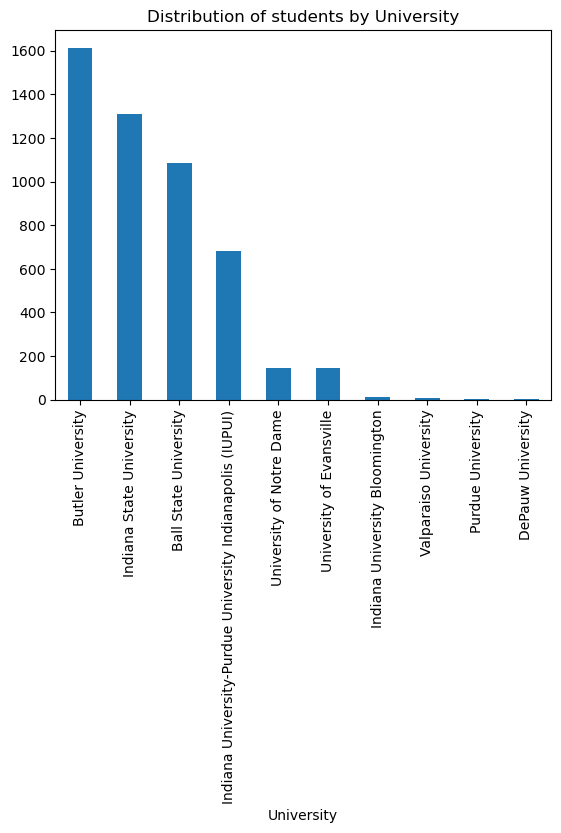

In [42]:
#distribution of university
print(data["University"].value_counts())
data["University"].value_counts().plot(kind='bar', title="Distribution of students by University")


Year
Year 3    2719
Year 2    2273
Year 1       5
Year 4       3
Name: count, dtype: int64


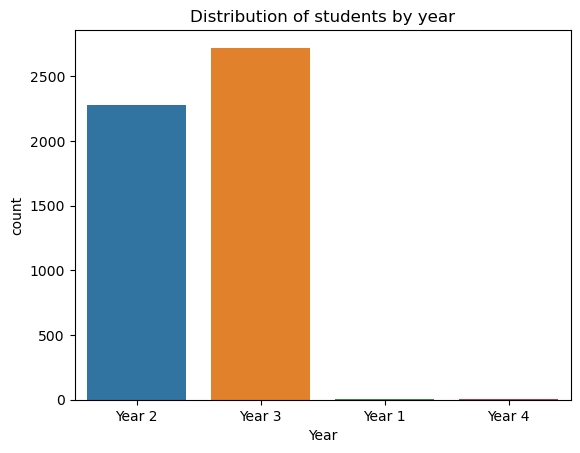

In [43]:
#distribution of student by year
print(data["Year"].value_counts())
sns.countplot(x='Year', data=data)
plt.title('Distribution of students by year')
plt.show()

Major
Chemistry                  640
Biology                    635
Astronomy                  619
Physics                    610
Mathematics                582
Economics                  511
Business Administration    334
Political Science          309
Marketing                  239
Anthropology               146
Finance                    135
Psychology                  76
Accounting                  62
Sociology                   31
International Business      29
Music                       21
Mechanical Engineering      11
Philosophy                   4
Fine Arts                    3
Civil Engineering            3
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of students by major'}, xlabel='Major'>

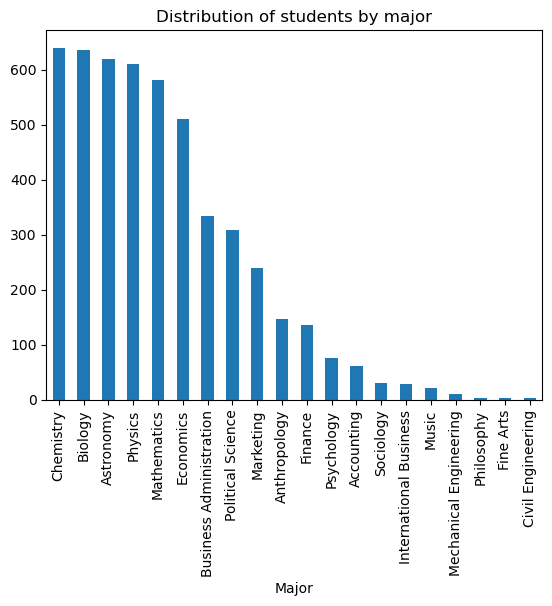

In [44]:
#distribution of students by major
print(data["Major"].value_counts())
data["Major"].value_counts().plot(kind='bar', title="Distribution of students by major")

## Q1:
### Exploratory Data Analysis (EDA) Report:

The dataset under consideration contains 5,000 rows and 5 columns, with no missing values. This data provides insights into undergraduate students in Indiana universities, encompassing their year in university, chosen major, attending institution, order time, and food preferences.

#### Key Findings:
- Year in University: The distribution of students across different academic years is skewed, with a predominant focus on sophomores and juniors, comprising approximately 99.8% of the dataset. Freshmen and seniors make up only a small portion.

- University Attendance: Several universities are represented, but the majority of students attend Butler University, Ball State University, and Indiana State University. Indiana University-Purdue University Indianapolis also has a significant presence. In contrast, Purdue and DePauw universities have minimal representation with just one student each.

- Majors: The dataset captures a diverse range of majors that students are pursuing. Further analysis of the distribution of majors can help identify which majors interested in ordering food from XFoods.

#### Visualizations:

- A bar chart showing the distribution of students across various universities.
- A bar chart illustrating the distribution of students across different academic years.
- A bar chart displaying the distribution of majors pursued by students.

#### Potential Business Use Cases:

- Market Research for Food Services: The data, which includes students' food orders, could be valuable for food service providers within these universities. Understanding the most popular food choices and peak ordering times could help in tailoring menus and improving service efficiency.

- Recruitment Strategies: Universities with a substantial representation of students in the dataset might find it useful for their recruitment and outreach efforts, targeting prospective students from these institutions.

- Academic Program Analysis: For academic institutions, analyzing the distribution of majors can provide insights into the popularity of different academic programs and assist in resource allocation and curriculum planning.

- Student Engagement: This dataset could be used to study student behavior and preferences. For example, understanding the relationship between majors and food choices or analyzing ordering patterns concerning university events and activities.

- Year-to-Year Trends: By collecting data over multiple years, the dataset could be used to identify trends in student preferences and university demographics, aiding in long-term strategic planning for both universities and food service providers.

#### Consideration of Bias:

- It's important to note that if this dataset were used to train machine learning algorithms, it would introduce biases towards underrepresented universities and class years. Specifically, universities such as Purdue and DePauw, as well as freshmen and seniors, are significantly underrepresented. These biases could result in algorithms that perform less accurately for these minority groups. Careful attention and mitigation strategies should be implemented when using this data for algorithmic applications to ensure equitable outcomes.

## Q2:
Ethical Implications:

- Data Bias: The dataset's inherent bias towards certain universities, class years, or majors could raise ethical concerns. Biased data can lead to discrimination in algorithmic decision-making, reinforcing existing inequalities.

- Privacy Concerns: While the dataset seems innocuous, it includes information about students, their academic pursuits, and food orders. Protecting the privacy of individuals is essential. Care must be taken to ensure that data is anonymized and stored securely to prevent data breaches and unauthorized access.

- Informed Consent: If the data collection involved human subjects, it's essential to consider whether informed consent was obtained and whether the data was collected ethically, respecting the rights of the participants.

Business Outcome Implications:

- Reputation and Trust: Biased or unethical data collection and usage can damage the reputation of businesses or institutions associated with the dataset. It erodes trust among customers, stakeholders, and partners.

- Competitive Advantage: Ethical data collection and unbiased data can provide a competitive advantage. A business that can demonstrate fairness and ethical standards in its data practices is likely to attract more customers and partners.

- Legal Compliance: Violating ethical data practices can lead to legal consequences and regulatory fines. Complying with data privacy regulations is crucial to avoid legal issues that could impact the bottom line.

Technical Implications:

- Data Preprocessing: Addressing data biases and ethical concerns may require extensive data preprocessing efforts. This might involve techniques like data augmentation, rebalancing, or oversampling to reduce bias in the data.

- Algorithmic Fairness: When using the data to train machine learning models, ensuring algorithmic fairness is a technical challenge. Bias mitigation techniques must be employed to prevent models from making unfair or discriminatory predictions.

- Data Security: Secure data storage and access controls are vital to protect sensitive information. Technical safeguards, like encryption and access restrictions, need to be in place to prevent data breaches.

- Scalability: As datasets grow, it becomes increasingly challenging to maintain ethical standards and mitigate biases. Businesses and organizations must invest in scalable solutions to ensure ethical data practices as data volume increases.

## Q3: Build a predicting model

### Preprocessing data

In [51]:
# Transform categorical data into numerical data using LabelEncoder
le = LabelEncoder()
data['University'] = le.fit_transform(data['University'])
data['Major'] = le.fit_transform(data['Major'])
data['Year'] = le.fit_transform(data['Year'])
data["Order"] = le.fit_transform(data["Order"])

# Split dataset into features (X) and target (y)
X = data.drop('Order', axis=1)
y = data['Order']

# Split dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Selection, Training, and Testing

We will use the following models to train and test our data:
- Random Forest
- KNN

In [55]:
# Define two models that we will use
models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

In [64]:
# Train and evaluate models
trained_models = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[model_name] = model

evaluation_results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Evaluation results of {model_name} are:")
    print(classification_report(y_test, y_pred))



Evaluation results of Random Forest are:
              precision    recall  f1-score   support

           0       0.61      0.46      0.52        94
           1       0.55      0.61      0.58       112
           2       0.73      0.56      0.63       107
           3       0.66      0.65      0.66       103
           4       0.62      0.58      0.60        93
           5       0.68      0.85      0.75        84
           6       0.76      0.85      0.80        95
           7       0.63      0.61      0.62       110
           8       0.59      0.61      0.60        98
           9       0.65      0.73      0.69       104

    accuracy                           0.65      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.65      0.65      0.64      1000

Evaluation results of KNN are:
              precision    recall  f1-score   support

           0       0.53      0.48      0.50        94
           1       0.50      0.52      0.51       112
      

### Intepretation of the results from two models

In conclusion, when comparing the two models, Random Forest and K-Nearest Neighbors (KNN), we find that Random Forest outperforms KNN in terms of accuracy and F1-scores for most classes. With an accuracy of 65%, Random Forest demonstrates better predictive capability compared to KNN, which achieves an accuracy of 60%.

The choice of model largely depends on the specific objectives and priorities of the task. If higher overall accuracy and F1-scores are more important, Random Forest is the preferred choice. However, model selection also depends on other factors, including computational resources and interpretability.

Therefore, if the primary goal is to maximize predictive accuracy, Random Forest is the model of choice. However, if the model's computational demands are a concern, or if interpretability is a higher priority, KNN may be a suitable alternative.

From our result, we will proceed to save the Random Forest model for reusablibity.

In [65]:
with open('rf_final.pkl', 'wb') as f:
    pickle.dump(trained_models["Random Forest"], f)

## Q4: 

To determine the suitability of implementing the described predictive model, consider the following key factors:

- Alignment with Objectives: Ensure that the model aligns with the business's goals and strategic objectives.

- Resource Availability: Assess the availability of data, expertise, and infrastructure for model development and maintenance.

- Model Performance Metrics: To ensure the effectiveness of the solution, it is crucial to evaluate model performance metrics such as accuracy, precision, and F1 recall scores. A relatively high level of accuracy is essential for customer satisfaction and reliable predictions.

- Explainability: Consider model interpretability, especially in regulated or decision-critical contexts.

- Costs: Analyze development and maintenance costs in relation to expected benefits and ROI.

- Scalability: Confirm that the solution can scale with growing data and business demands.

- Privacy and Data Usage: Addressing user privacy concerns is paramount. It is imperative to obtain user consent and clearly communicate how their data will be used and protected. Respecting individual privacy preferences is crucial, even if explicit concerns are not raised.
